## Segunda aula - 19/10/2017

### Conceitos básicos de redes complexas

In [1]:
# Importa os pacotes necessários.
import networkx as nx
import matplotlib.pylab as plt
import numpy as np

# Ignora mensagens de warnings na hora de desenhar o grafo.
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

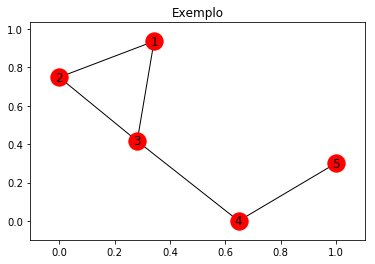

In [2]:
# Cria o objeto para o grafo exemplo.
g = nx.Graph()

# Adiciona as arestas.
g.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

# Desenha o grafo exemplo.
nx.draw_networkx(g)
plt.title("Exemplo");

### Exercícios:

1) Fornecer uma lista de adjacência ou uma matriz de adjacência e converter uma forma à outra.

2) Dada uma matriz de adjacência Madj, calcule, sem usar bibliotecas específicas, os seguintes índices básicos:


 - a) Ordem N e tamanho L;
 
 
 - b) Os graus ki's dos vértices i's (i = 1, 2, 3, ..., N) e a respectiva média km;
 
 
 - c) Os coeficientes de aglomeração ci's e a respectiva média cm;
 
 
 - d) Os mínimos caminhos médios li's e a respectiva média lm;
 
 
 - e) E o diâmetro Diam do grafo.

In [3]:
# Lista de adjacência do exemplo.
Ladj = np.array([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

# Matriz de adjacência do exemplo.
Madj = np.array([[0, 1, 1, 0, 0],
                 [1, 0, 1, 0, 0],
                 [1, 1, 0, 1, 0],
                 [0, 0, 1, 0, 1],
                 [0, 0, 0, 1, 0]])

### Respostas

#### Exercício 1:

In [4]:
def Ladj2Madj(Ladj):
    
    # Conta quantos nós há na rede.
    N = np.size(np.unique(Ladj))
    
    # Inicializa a matriz.
    Madj = np.zeros((N, N))
    
    # Preenche a matriz.
    for aresta in Ladj:
        i = aresta[0] - 1
        j = aresta[1] - 1
        Madj[i][j] = Madj[j][i] = 1
    
    return Madj
    
    
def Madj2Ladj(Madj):
    
    # Conta quantos nós há na rede.
    N = Madj.shape[0]
    
    # Inicializa a lista.
    Ladj = []
    
    # Itera acima da diagonal da matriz.
    for i in range(N):
        for j in range(i + 1, N):
            if Madj[i, j] != 0:
                 aresta = (i + 1, j + 1)
                 Ladj.append(aresta)   
            
    return np.array(Ladj) 

#### Exercício 2:

### Testes

#### Exercício 1:

In [5]:
# Testa se é possível recuperar Madj a partir de Ladj
print(Ladj2Madj(Ladj) == Madj)

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [6]:
# Testa se é possível recuperar Ladj a partir de Madj
print(Madj2Ladj(Madj) == Ladj)

[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


#### Exercício 2:

### Testes adicionais com outro grafo

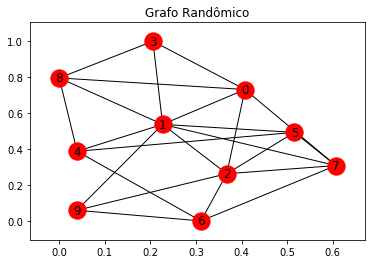

In [7]:
# Grafo randômico.
g_er = nx.erdos_renyi_graph(10, 0.5)

# Matriz de adjacência do grafo randômico acima. 
Madj_er = nx.adjacency_matrix(g_er)

# Desenha o grafo.
nx.draw_networkx(g_er)
plt.title("Grafo Randômico");

#### Exercício 1:

In [8]:
# Testa se a lista de adjacência gerada pelo pacote networkx é igual  
# à lista gerada pela minha função.

print("\nListas de adjacência:\n")
print("---- a) gerada pelo pacote networkx: ---- \n")
for line in nx.adjlist.generate_adjlist(g_er):
    print(line)
    
print("\n---- b) gerada pela minha funcao = ---- \n")    
for i in (Madj2Ladj(Madj_er)):
    print(i-1, end='')


Listas de adjacência:

---- a) gerada pelo pacote networkx: ---- 

0 1 2 3 7 8
1 2 3 4 5 7 8 9
2 5 6 7 9
3 8
4 5 6 8
5 7
6 7 9
7
8
9

---- b) gerada pela minha funcao = ---- 

[0 1][0 2][0 3][0 7][0 8][1 2][1 3][1 4][1 5][1 7][1 8][1 9][2 5][2 6][2 7][2 9][3 8][4 5][4 6][4 8][5 7][6 7][6 9]

#### Exercício 2: